<a href="https://colab.research.google.com/github/KinuthiaJ/FINANACIAL-INCLUSION/blob/main/Copy_of_Financial_Inclusion_Analysis_Jane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SPECIFYING THE QUESTION**

Which individuals are most likely to have or use a bank account?

**DEFINING THE METRIC FOR SUCCESS**

**UNDERSTANDING THE CONTEXT**

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

**RECORDING THE EXPERIMENTAL DESIGN**

The data was collected through a probability survey with an end user focus (individual or household) of financial services and products

**DATA RELEVANCE**

The data was extracted from various Finscope surveys from 2016 to 2018.

**READING THE DATA**

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
from matplotlib.pyplot import subplot

In [2]:
# Reading the data
fin_df = pd.read_csv (r'Financial Dataset - 1.csv')

**CHECKING THE DATA**

In [3]:
# Checking the number of records in our dataset
fin_df.shape

(8432, 13)

The dataset has 23,524 rows and 13 columns. Therefore we have 13 variables in our data.

In [4]:
# previewing the first 5 rows of our dataset
fin_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
# Previewing the last 5 rows of our dataset
fin_df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
8427,Rwanda,2016,uniqueid_2360,No,Rural,Yes,3,57.0,Female,Head of Household,Divorced/Seperated,No formal education,Farming and Fishing
8428,Rwanda,2016,uniqueid_2361,No,Rural,Yes,2,61.0,Female,Head of Household,Widowed,Primary education,Farming and Fishing
8429,Rwanda,2016,uniqueid_2362,No,Rural,Yes,5,60.0,Female,Head of Household,Widowed,No formal education,Farming and Fishing
8430,Rwanda,2016,uniqueid_2363,No,Rural,Yes,4,16.0,Male,Parent,Single/Never Married,Secondary education,Informally employed
8431,Rwanda,2016,uniqueid_2364,No,Rural,Yes,4,30.0,Male,Head of Household,Married/Liv,NaN,NaN


In [6]:
# Checking whether each column has an appropriate datatype
fin_df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size              int64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

All the columns have the correct data type

**EXTERNAL DATA SOURCE VALIDATION**

There has been an increase in access to formal financial services over the years. This can be attributed to an increase in utilization of mobile financial services. However, some households and individuals still utilize the informal or non-regulated financial channels. 
https://www.statista.com/statistics/1219362/access-to-financial-services-and-products-in-kenya/


**TIDYING THE DATASET**

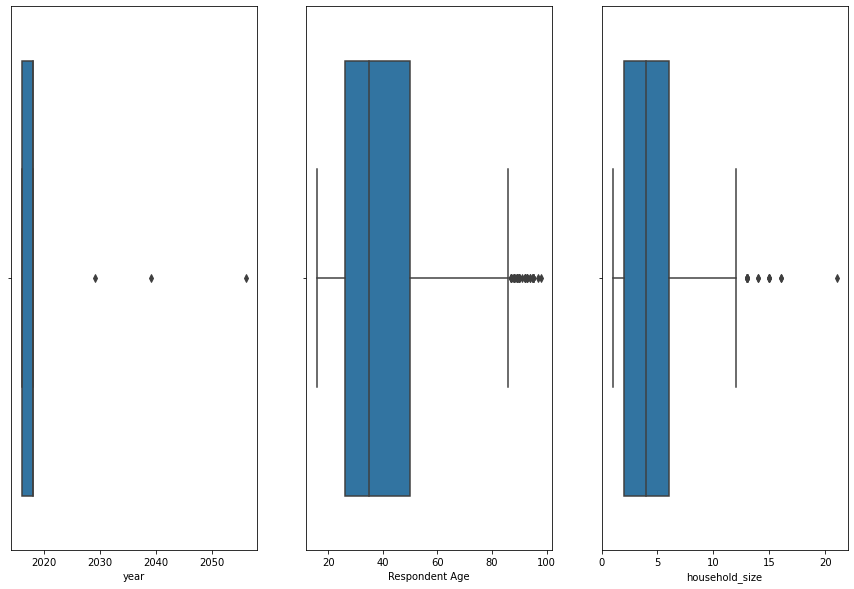

In [7]:
# Checking for Outliers
numeric_cols = ["year","Respondent Age", "household_size"]
fig,axes = plt.subplots(nrows=1, ncols=3,figsize = (15,10))
for ax, data, column in zip (axes.flatten(),fin_df,numeric_cols):
  sns.boxplot(fin_df[column],ax=ax)

From the above visualizations, we can tell that from our data we have;
1. Entries under year that are beyond the scope i.e. > 2018
2. Some of the resondents are aged above 80 years old
3. Some of the households interviewed have more than 10 members in the household. 

In [8]:
# Dealing with the outliers
# Previewing outliers under year
fin_df["year"].value_counts()

2018    6066
2016    2363
2029       1
2056       1
2039       1
Name: year, dtype: int64

We have entries with the years 2029, 2056 and 2039 which are outside our scope. i.e. between 2016 and 2018. We shall therefore drop these entries

In [9]:
# Dropping the outliers in year
new_fin = fin_df[fin_df["year"]<2018]
new_fin.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
6068,Rwanda,2016,uniqueid_1,No,Urban,Yes,7,18.0,Female,Child,Single/Never Married,Secondary education,Remittance Dependent
6069,Rwanda,2016,uniqueid_2,Yes,Urban,Yes,4,26.0,Female,Spouse,Married/Living together,Secondary education,Self employed
6070,Rwanda,2016,uniqueid_3,No,Rural,No,6,42.0,Male,Head of Household,Married/Living together,No formal education,Farming and Fishing
6071,Rwanda,2016,uniqueid_4,Yes,Urban,Yes,1,41.0,Male,Head of Household,Single/Never Married,Tertiary education,Informally employed
6072,Rwanda,2016,uniqueid_5,No,Rural,No,4,17.0,Female,Child,Single/Never Married,Primary education,Informally employed


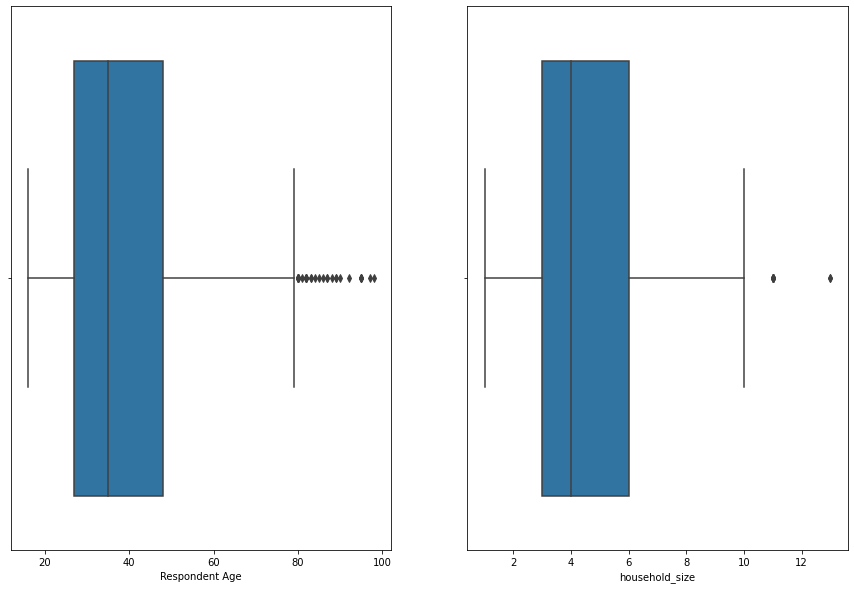

In [10]:
#checking for outliers in the new dataset
numeric_cols = ["Respondent Age", "household_size"]
fig,axes = plt.subplots(nrows=1, ncols=2,figsize = (15,10))
for ax, data, column in zip (axes.flatten(),fin_df,numeric_cols):
  sns.boxplot(new_fin[column],ax=ax)

In [11]:
# Descriptive statistics for the data
new_fin.describe()

,year,household_size,Respondent Age
count,2363.0,2363.000000,2360.000000
mean,2016.0,4.507406,38.690254
std,0.0,1.958353,16.021824
min,2016.0,1.000000,16.000000
25%,2016.0,3.000000,27.000000
50%,2016.0,4.000000,35.000000
75%,2016.0,6.000000,48.000000
max,2016.0,13.000000,98.000000


In [12]:
#Replacing the outliers with the mean
outlierfilter1 = new_fin["Respondent Age"]>70
new_fin.loc[outlierfilter1,"Respondent Age"] = 39
outlierfilter2 = new_fin["household_size"]>8
new_fin.loc[outlierfilter2,"household_size"] = 3

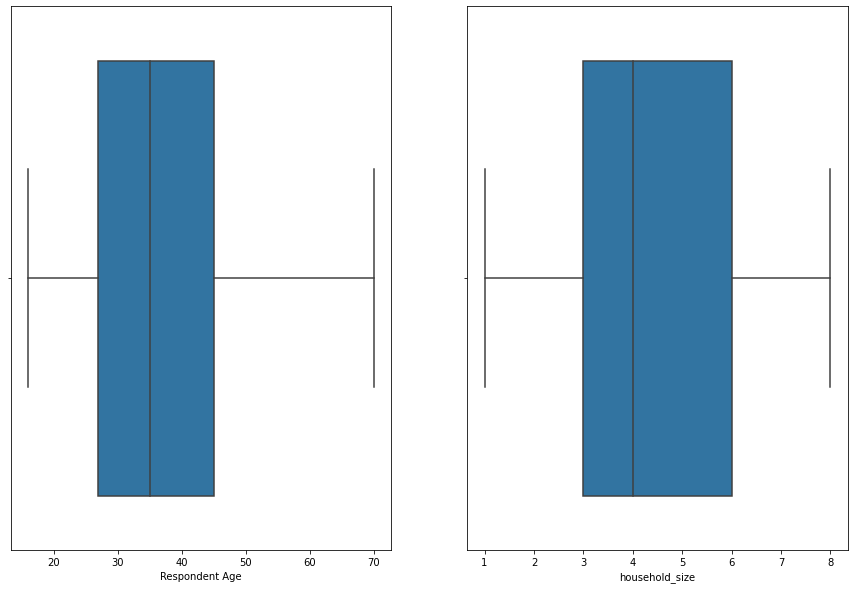

In [13]:
#Rechecking the outliers
numeric_cols = ["Respondent Age", "household_size"]
fig,axes = plt.subplots(nrows=1, ncols=2,figsize = (15,10))
for ax, data, column in zip (axes.flatten(),fin_df,numeric_cols):
  sns.boxplot(new_fin[column],ax=ax)

In [14]:
# Checking for anomalies
# Identifying missing data
new_fin.isna().value_counts()

country  year   uniqueid  Has a Bank account  Type of Location  Cell Phone Access  household_size  Respondent Age  gender_of_respondent  The relathip with head  marital_status  Level of Educuation  Type of Job
False    False  False     False               False             False              False           False           False                 False                   False           False                False          2359
                                                                                                   True            False                 False                   False           False                False             3
                                                                                                   False           False                 False                   False           True                 True              1
dtype: int64

There are null values in the dataset. However, the null values are few and therefore we shall drop these null values

In [15]:
# Dropping the missing values
new_fin.dropna()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
6068,Rwanda,2016,uniqueid_1,No,Urban,Yes,7,18.0,Female,Child,Single/Never Married,Secondary education,Remittance Dependent
6069,Rwanda,2016,uniqueid_2,Yes,Urban,Yes,4,26.0,Female,Spouse,Married/Living together,Secondary education,Self employed
6070,Rwanda,2016,uniqueid_3,No,Rural,No,6,42.0,Male,Head of Household,Married/Living together,No formal education,Farming and Fishing
6071,Rwanda,2016,uniqueid_4,Yes,Urban,Yes,1,41.0,Male,Head of Household,Single/Never Married,Tertiary education,Informally employed
6072,Rwanda,2016,uniqueid_5,No,Rural,No,4,17.0,Female,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8426,Rwanda,2016,uniqueid_2359,Yes,Rural,Yes,8,37.0,Male,Head of Household,Married/Living together,Secondary education,Other Income
8427,Rwanda,2016,uniqueid_2360,No,Rural,Yes,3,57.0,Female,Head of Household,Divorced/Seperated,No formal education,Farming and Fishing
8428,Rwanda,2016,uniqueid_2361,No,Rural,Yes,2,61.0,Female,Head of Household,Widowed,Primary education,Farming and Fishing
8429,Rwanda,2016,uniqueid_2362,No,Rural,Yes,5,60.0,Female,Head of Household,Widowed,No formal education,Farming and Fishing


**UNIVARIATE ANALYSIS**

In [16]:
# Obtaining the mean of the numerical variables in the data
Z = new_fin["Respondent Age"].mean()
print(Z)
Y = new_fin["household_size"].mean()
print(Y)

36.771610169491524
4.32120186203978


The average age of the respondents is 37 years, while the average householde has 3 members.

In [17]:
# Obtaining the mode of the numerical variables in the data
W = new_fin["Respondent Age"].mode()
print(W)
V = new_fin["household_size"].mode()
print(V)

0    39.0
dtype: float64
0    3
dtype: int64


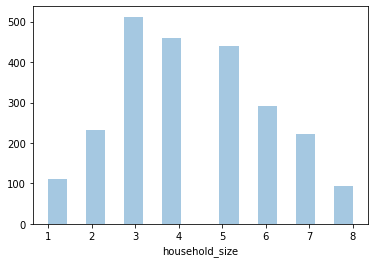

In [18]:
# Plotting the distributions for the numerical variables
sns.distplot(new_fin["household_size"],kde = False)

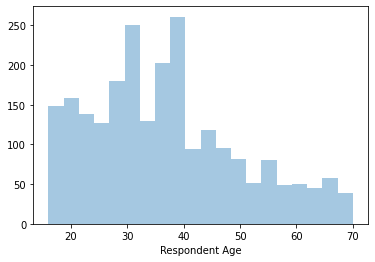

In [19]:
sns.distplot(new_fin["Respondent Age"],kde=False)

A majority of the respondents are aged 39 years. Many of the respondents come from a household of 2 members

In [20]:
# Obtaining the median of the numerical variables
U = new_fin["Respondent Age"].median()
print(U)
T = new_fin["household_size"].median()
print(T)

35.0
4.0


The median age of the respondents is 35 and the median household size is 3.

In [21]:
# Obtaining the range for the numerical variables
range1 = new_fin["Respondent Age"].max() -  new_fin["Respondent Age"].min()
print(range1)
range2 = new_fin["household_size"].max() - new_fin["household_size"].min()
print(range2)

54.0
7


The range for both variables is high at 54 for respondent age and 8 for household size. This indicates that both groups are highly variable. 

In [22]:
# For the categorical variables, we shall obtain the value counts for each category
C = new_fin["country"].value_counts()
print(C)

D = new_fin["Has a Bank account"].value_counts()
print(D)

E = new_fin["Type of Location"].value_counts()
print(E)

F = new_fin["Cell Phone Access"].value_counts()
print(F)

G = new_fin["gender_of_respondent"].value_counts()
print(G)

H = new_fin["The relathip with head"].value_counts()
print(H)

I = new_fin["marital_status"].value_counts()
print(I)

J = new_fin["Level of Educuation"].value_counts()
print(J)

K = new_fin["Type of Job"].value_counts()
print(K)

Rwanda    2363
Name: country, dtype: int64
No     2085
Yes     278
Name: Has a Bank account, dtype: int64
Rural    2047
Urban     316
Name: Type of Location, dtype: int64
Yes    1972
No      391
Name: Cell Phone Access, dtype: int64
Female    1373
Male       990
Name: gender_of_respondent, dtype: int64
Head of Household      1245
Spouse                  676
Child                   333
Parent                   62
Other non-relatives      27
Other relative           20
Name: The relathip with head, dtype: int64
Married/Living together    1442
Single/Never Married        507
Widowed                     288
Divorced/Seperated          125
Married/Liv                   1
Name: marital_status, dtype: int64
Primary education                  1304
No formal education                 573
Secondary education                 399
Tertiary education                   52
Vocational/Specialised training      31
6                                     3
Name: Level of Educuation, dtype: int64
Farming an

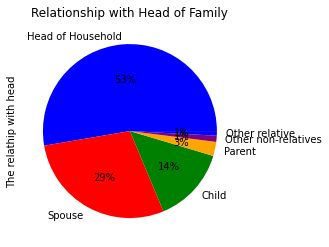

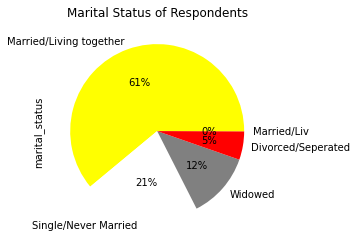

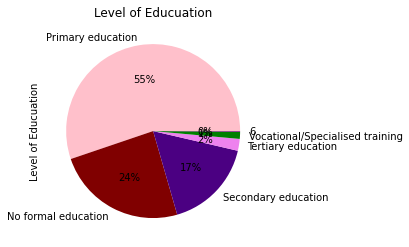

In [23]:
# Plotting pie charts of the categorical variables
Colours1 = ['blue','red','green','orange','purple']
Colours2 = ['yellow','white','grey','red']
Colours3 = ['pink','maroon','indigo','violet','green','purple']
ax1 = new_fin['The relathip with head'].value_counts().plot(kind='pie',colors = Colours1, autopct = '%1.0f%%')
ax1.set_title ('Relationship with Head of Family', fontsize = 12)
plt.show()

ax1 = new_fin['marital_status'].value_counts().plot(kind='pie', colors= Colours2, autopct = '%1.0f%%')
ax1.set_title ('Marital Status of Respondents', fontsize = 12)
plt.show()

ax1 = new_fin['Level of Educuation'].value_counts().plot(kind='pie',colors = Colours3,autopct = '%1.0f%%')
ax1.set_title ('Level of Educuation', fontsize = 12)
plt.show()


From the above visualizations, a majority of the respondents were the head of the households (54%). 
Many of the respondents were either Married/Living together (38%) or single/never married (40%)
The highest level of education among the respondents was tertiary education. However, only 5% of the respondents had attained this level. A vast majority had primary education (59%) 

In [24]:
# Calculating the standard deviation and variance of the numerical variables
sd1 = new_fin["Respondent Age"].std()
print ("The standard deviation for the respondents age is",sd1)
sd2 = new_fin["household_size"].std()
print ("The standard deviation for the household size is",sd2)

The standard deviation for the respondents age is 13.269628584269334
The standard deviation for the household size is 1.7596002291519957


In [25]:
vr1 = new_fin["Respondent Age"].var()
print ("The variance for the respondents age is",vr1)
vr2 = new_fin["household_size"].var()
print ("The variance for the household size is",vr2)

The variance for the respondents age is 176.0830427644578
The variance for the household size is 3.0961929664317553


In [26]:
# obtaining the interquartile range
IQR1 = new_fin["Respondent Age"].quantile([0.25,0.5,0.75])
print(IQR1)
IQR2 = new_fin["household_size"].quantile([0.25,0.5,0.75])
print(IQR2)

0.25    27.0
0.50    35.0
0.75    45.0
Name: Respondent Age, dtype: float64
0.25    3.0
0.50    4.0
0.75    6.0
Name: household_size, dtype: float64


In [27]:
# Calculating the skewness and kurtosis of the numerical variables
SK1 = new_fin["Respondent Age"].skew()
print(SK1)
SK2 = new_fin["household_size"].skew()
print(SK2)
KT1 = new_fin["Respondent Age"].kurt()
print(KT1)
KT2 = new_fin["Respondent Age"].kurt()
print(KT2)

0.5660755887031464
0.18056839553654974
-0.3592476183487614
-0.3592476183487614


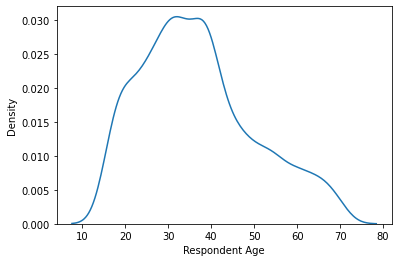

In [28]:
#plotting the distribution of the numerical variables
sns.kdeplot(data= new_fin, x=new_fin["Respondent Age"])

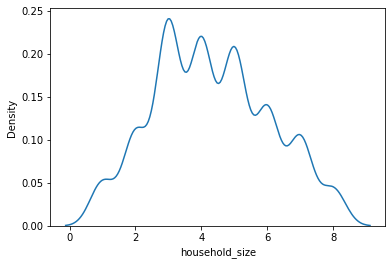

In [29]:
sns.kdeplot(data= new_fin, x=new_fin["household_size"])

Both the distributions are skewed to the right which means the mean is less than the mode (Negative skewness)
The tails are thin which indicates a platykurtic distribution where the kurtosis is less than zero. 

**BIVARIATE ANALYSIS**

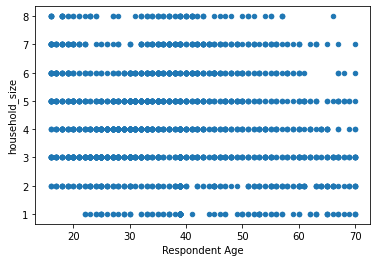

In [30]:
# Plotting a scatter plot to check the relationship between the respondent age and household size

new_fin.plot(x = 'Respondent Age', y = 'household_size', kind='scatter')

In [31]:
pearson_coeff = new_fin["Respondent Age"].corr(new_fin["household_size"], method="pearson") 
print(pearson_coeff)


-0.09897374463496342


From the above plot and the pearson coefficient, there is no relationship between the respondent age and household size. 





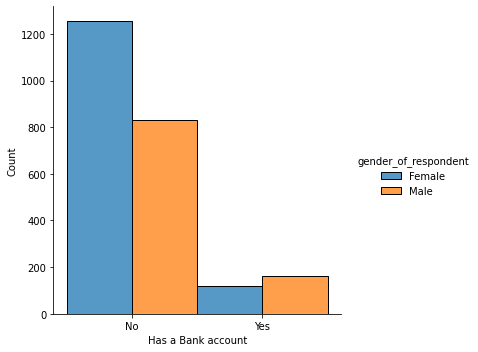

In [38]:
sns.displot(new_fin, x="Has a Bank account", hue="gender_of_respondent", multiple="dodge")

In general, more males have bank accounts than females. 

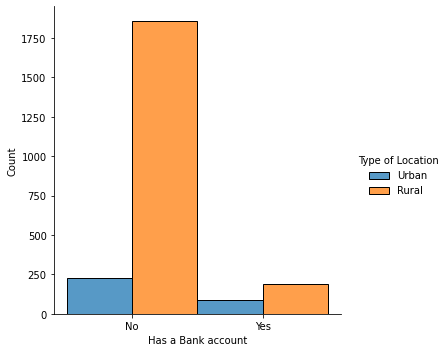

In [41]:
sns.displot(new_fin, x="Has a Bank account", hue="Type of Location", multiple="dodge")

Majority of the respondents from the rural areas do not have bank accounts.

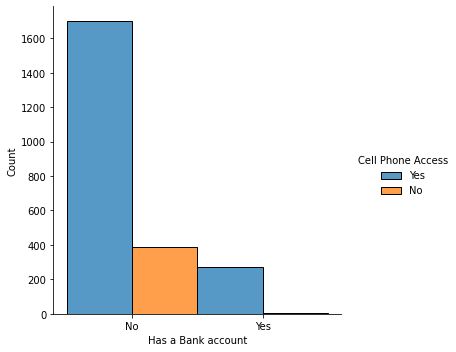

In [42]:
sns.displot(new_fin, x="Has a Bank account", hue="Cell Phone Access", multiple="dodge")

Despite having access to cell phones, majority of the respondents did not have bank accounts which would suggest that majority of them are able to access informal financial services using their cell phones. 

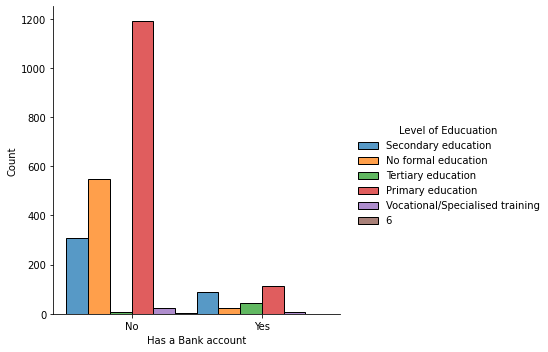

In [43]:
sns.displot(new_fin, x="Has a Bank account", hue="Level of Educuation", multiple="dodge")


The level of education plays a role in whether or not one has a bank account. From the above plot, lowest level of education is Primary education where a majority of the respondents that had only primary education did not have bank accounts. 
In contract, the highest level of education was Tertiary education. Very few of the respondents had attained tertiary education and all of them had bank accounts

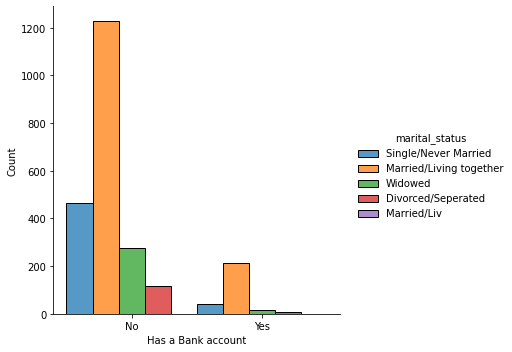

In [44]:
sns.displot(new_fin, x="Has a Bank account", hue="marital_status", multiple="dodge")


It is clear that marital status does not necessarily determine whether or not one has a bank account. For example, majority of the respondents who were married/living together did not have bank accounts. Whereas in the same category, many of the respondents did have bank accounts. 

**MUTLIVARIATE ANALYSIS**

In [32]:
# Preprocessing
# Encoding the categorical variables
encoded= pd.get_dummies(new_fin, columns = ['country',	'Type of Location','Cell Phone Access','gender_of_respondent','The relathip with head',	'marital_status','Level of Educuation','Type of Job'])
new_encoded = encoded.drop(["uniqueid"],axis=1)
x = new_encoded.drop(['Has a Bank account'],1)
y = new_encoded['Has a Bank account']
new_encoded.head()

,year,Has a Bank account,household_size,Respondent Age,country_Rwanda,Type of Location_Rural,Type of Location_Urban,Cell Phone Access_No,Cell Phone Access_Yes,gender_of_respondent_Female,...,Level of Educuation_Vocational/Specialised training,Type of Job_Dont Know/Refuse to answer,Type of Job_Farming and Fishing,Type of Job_Formally employed Government,Type of Job_Formally employed Private,Type of Job_Government Dependent,Type of Job_Informally employed,Type of Job_Other Income,Type of Job_Remittance Dependent,Type of Job_Self employed
6068,2016,No,7,18.0,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
6069,2016,Yes,4,26.0,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
6070,2016,No,6,42.0,1,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
6071,2016,Yes,1,41.0,1,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
6072,2016,No,4,17.0,1,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0


In [33]:
# importing and applying standard scaler on the encoded categorical variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x)

StandardScaler()

In [34]:
#transforming the scaled variables
scaled_df = sc.transform(x)
scaled_df

array([[ 0.        ,  1.52271243, -1.41492946, ..., -0.18353008,
         3.46172161, -0.2793044 ],
       [ 0.        , -0.18258116, -0.81192122, ..., -0.18353008,
        -0.2888736 ,  3.58032309],
       [ 0.        ,  0.95428123,  0.39409527, ..., -0.18353008,
        -0.2888736 , -0.2793044 ],
       ...,
       [ 0.        ,  0.38585004,  1.75086383, ..., -0.18353008,
        -0.2888736 , -0.2793044 ],
       [ 0.        , -0.18258116, -1.56568153, ..., -0.18353008,
        -0.2888736 , -0.2793044 ],
       [ 0.        , -0.18258116, -0.5104171 , ..., -0.18353008,
        -0.2888736 , -0.2793044 ]])

In [35]:
#np.isnan(scaled_df.any()) 
z = np.isfinite(scaled_df.all())
z


True

In [36]:
# Importing PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca.fit(scaled_df)

ValueError: ignored

In [ ]:
x_pca = pca.transform(scaled_df)